In [1]:
import matplotlib.pyplot as plt

### Testing ideas
**CASE 1** - testing context manager & capture_output with simple plot in cell magic  - does not work

In [2]:
from IPython.core.magic import (Magics, magics_class, cell_magic)
from IPython import get_ipython
from IPython.utils.capture import capture_output

@magics_class
class MyMagic(Magics):
    @cell_magic
    def caputre_png_test1(self, line, cell):
        print("hello caputre_png_test")
        with capture_output(stdout=False, stderr=False, display=False) as result: 
            plt.plot([1,2],[10,20]) # should capture the plot and not display anything
            print(result.outputs) # should print list that contains the plot object

ipy = get_ipython()
ipy.register_magics(MyMagic)

hello caputre_png_test
[]


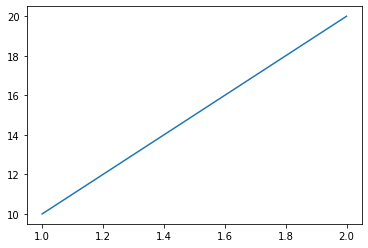

In [3]:
%%caputre_png_test1
pass

**CASE 2** - testing context manager & capture_output in combination with `exec(cell)`- does not work

In [4]:
from IPython.core.magic import (Magics, magics_class, cell_magic)
from IPython import get_ipython
from IPython.utils.capture import capture_output
import matplotlib.pyplot as plt

@magics_class
class MyMagic(Magics):
    @cell_magic
    def caputre_png_test2(self, line, cell):
        print("hello caputre_png_test2")
        exec(cell) # should capture the plot and not display anything
        with capture_output(stdout=False, stderr=False, display=False) as result:
            print(result.outputs) # should print list that contains the plot object

ipy = get_ipython()
ipy.register_magics(MyMagic)

hello caputre_png_test2
[]


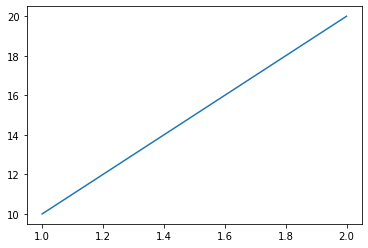

In [5]:
%%caputre_png_test2
plt.plot([1,2],[10,20])

**CASE 3** - Ugly workaround: cell magic defined in a string - WORKS!

In [6]:
class UglyWorkAround:
    cell_magic_definition= """
from IPython.core.magic import register_cell_magic
from IPython import get_ipython
@register_cell_magic
def caputre_png_ugly(line, cell):
    print("hello caputre_png")
    get_ipython().run_cell_magic(
        'capture',
        ' --no-stderr --no-stdout result',
        cell
    )
    print(result.outputs)
    """
exec(UglyWorkAround.cell_magic_definition)

In [7]:
%%caputre_png_ugly
plt.plot([1,2],[10,20])

hello caputre_png
[<IPython.utils.capture.RichOutput object at 0x1105219a0>, <IPython.utils.capture.RichOutput object at 0x110521fa0>]


**CASE 4** - Cell magic defined in notebook - WORKS

In [8]:
from IPython.core.magic import register_cell_magic
from IPython import get_ipython
@register_cell_magic
def caputre_png(line, cell):
    print("hello caputre_png")
    get_ipython().run_cell_magic(
        'capture',
        ' --no-stderr --no-stdout result',
        cell
    )
    print(result.outputs)

In [9]:
%%caputre_png
import matplotlib.pyplot as plt
plt.plot([1,2],[10,20])

hello caputre_png
[<IPython.utils.capture.RichOutput object at 0x129815310>, <IPython.utils.capture.RichOutput object at 0x1298155e0>]
